<a href="https://colab.research.google.com/github/Devansharma/Sigmoid_Neuron/blob/master/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

ERROR! Session/line number was not unique in database. History logging moved to new session 62


# **Plotting sigmoid neuron**

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [114]:
sigmoid(1,0.5,0)

0.6224593312018546

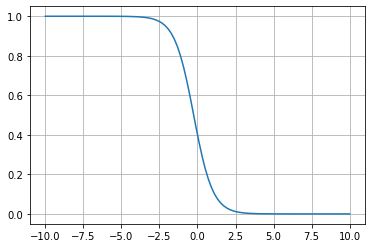

In [115]:
w = -1.6      #@param {type: "slider", min: -2, max: 2, step:0.1}
b = -0.4     #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.grid()
plt.show()

$S_{w1, w2, b}(x_1, x_2) = \frac{1}{1+e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [117]:
sigmoid2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 80)
XX1, XX2 = np.meshgrid(X1, X2) 

In [0]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid2d(XX1, XX2, w1, w2, b)

In [0]:
cmap_new = matplotlib.colors.LinearSegmentedColormap.from_list("",["red", "yellow", "green"])

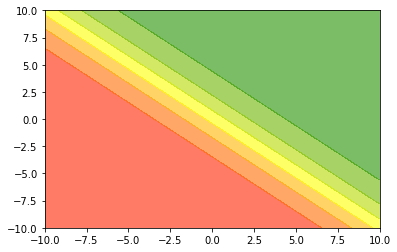

In [121]:
plt.contourf(XX1, XX2, Y, cmap = cmap_new, alpha = 0.6)
plt.show()

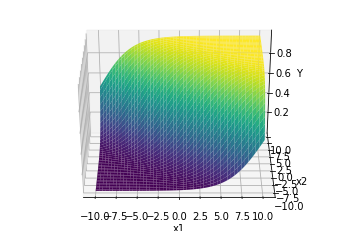

In [122]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y');

ax.view_init(30, 270)

# **Compute loss for a given Dataset**

In [0]:
w_uk = 0.5
b_uk = 0.25
X = np.random.random(25) * 20 - 10        #we want range between -10 to 10 so we multiply the with total length as random.random generates numbers between -1 & 1 and subtract 10 to make the avg 0 
Y = sigmoid(X, w_uk, b_uk)

<function matplotlib.pyplot.show>

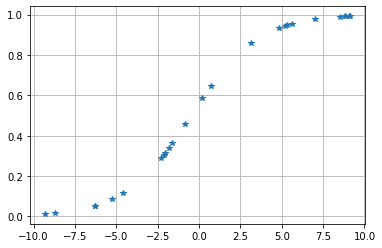

In [124]:
plt.plot(X, Y, '*')
plt.grid()
plt.show

In [0]:
def cal_loss(X, Y, w_estimate, b_estimate):
  loss = 0
  for x,y in zip(X, Y):
    loss += (y - sigmoid(x, w_estimate, b_estimate))**2
  return loss

In [0]:
W = np.linspace(0, 2, 100)
B = np.linspace(-1, 1, 100)
WW, BB = np.meshgrid(W, B)
WW.shape
Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = cal_loss(X, Y, WW[i, j], BB[i,j])

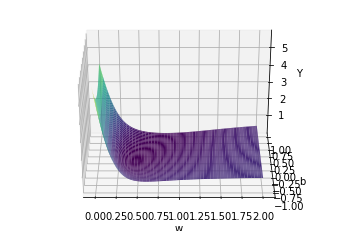

In [128]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Y');

ax.view_init(30, 270) 

In [129]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])
print(i, j)
print(WW[i, j], BB[i, j])

62 25
0.5050505050505051 0.2525252525252526


#Class for Sigmoid Neuron

In [0]:
class sigmoidneuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

#Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3,1.25], [-2,-4], [1,5]])
Y = [1, 1, 1, 0, 0, 0]

In [132]:
sn = sigmoid_neuron()
sn.fit(X, Y, 1, 0.25, True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap = cmap_new, alpha = 0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap= cmap_new)
  ax.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-1.07233219  0.30007312]] [-0.00689712]



[[-0.92760957  0.23813555]] [-0.04012395]



[[-0.7488595   0.16547842]] [-0.06614765]



[[-0.51197298  0.077399  ]] [-0.08243117]



[[-0.17321295 -0.03035653]] [-0.08582192]



[[ 0.25585742 -0.12912179]] [-0.07431822]



[[ 0.46694611 -0.15746983]] [-0.08295865]



[[ 0.58036372 -0.19578363]] [-0.10154624]



[[ 0.66595815 -0.22038501]] [-0.12245505]



[[ 0.73554057 -0.24228712]] [-0.14413693]



[[ 0.79533949 -0.26114359]] [-0.16585008]



[[ 0.8481556  -0.27800021]] [-0.18725007]



[[ 0.8957015  -0.29327009]] [-0.20814598]



[[ 0.93906954 -0.30726082]] [-0.22843559]



[[ 0.97901349 -0.32018724]] [-0.24806747]



[[ 1.01608013 -0.33220922]] [-0.26702135]



[[ 1.05068241 -0.34344985]] [-0.28529642]



[[ 1.08314225 -0.35400668]] [-0.30290405]



[[ 1.11371714 -0.3639588 ]] [-0.31986315]



[[ 1.14261737 -0.3733715 ]] [-0.33619716]


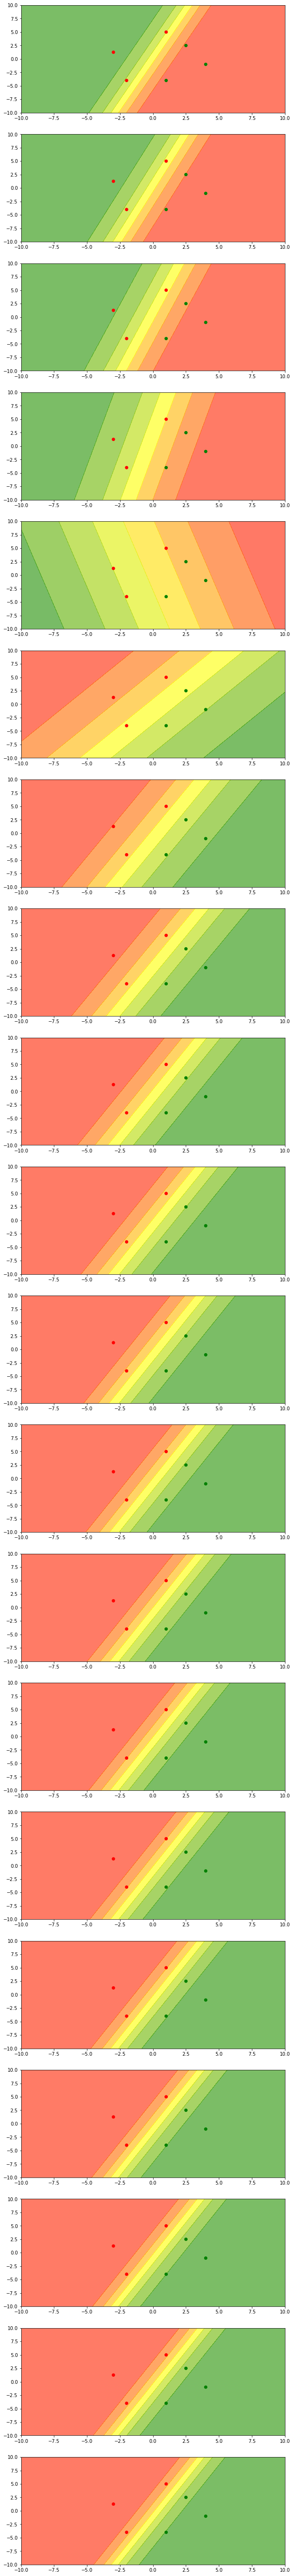

In [134]:
sn.fit(X, Y, 1, 0.05, True)
N= 30
plt.figure(figsize=(10, N*5))
for i in range(20):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.25, False)

# Load Data

In [192]:
data = pd.read_csv('mobile_cleaned.csv')
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X = data.drop('Rating', axis = 1)
Y = data['Rating'].values

In [194]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2
data['Class'] = (data['Rating']>=threshold).astype(np.int)

In [196]:
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarized = data['Class'].values

# Standardization

In [0]:
R = np.random.random([100, 1])

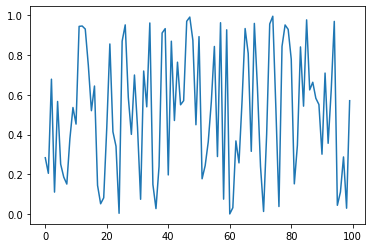

In [199]:
plt.plot(R)
plt.show()

In [200]:
print(np.mean(R), np.std(R))

0.5223654181881764 0.3151905082147699


In [0]:
scaler = StandardScaler()

In [202]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [203]:
print(scaler.mean_)

[0.52236542]


In [0]:
RT = scaler.transform(R)

In [205]:
print(np.mean(RT), np.std(RT))

-9.46465128492946e-17 1.0


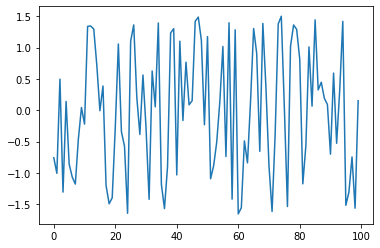

In [206]:
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y_binarized)

In [208]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(255, 87) (86, 87)
(255,) (86,)


In [0]:
Scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmaxscalar = MinMaxScaler()

In [0]:
Y_scaled_train = minmaxscalar.fit_transform(Y_train.reshape(-1, 1))

In [0]:
Y_scaled_test = minmaxscalar.transform(Y_test.reshape(-1, 1))

In [0]:
scaled_threshold = list(minmaxscalar.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [215]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarized_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()
Y_binarized_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

In [217]:
Y_binarized_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

# Training on Real Data

In [0]:
sn = sigmoid_neuron()

TypeError: ignored

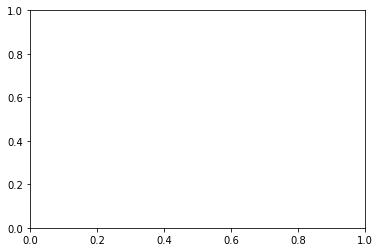

In [219]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 2000, learning_rate=0.015, display_loss=True)